In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
# matplotlib
plt.figure(figsize = (8,8))


In [4]:
housing_data = pd.read_pickle("./realestate-train.pickle")
housing_data = pd.DataFrame(housing_data)

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947829 entries, 0 to 947828
Data columns (total 13 columns):
ASSETROOMNUM             947829 non-null object
BUILDINGFLOORS           779380 non-null object
BUILDINGYEAR             835762 non-null object
DEALAMOUNT               947829 non-null int64
DEALDATE                 947829 non-null object
DEALNATURE               947829 non-null object
DEALNATUREDESCRIPTION    898338 non-null object
DISPLAYADRESS            947829 non-null object
FLOORNO                  784207 non-null object
FULLADRESS               947829 non-null object
NEWPROJECTTEXT           947829 non-null object
PROJECTNAME              98173 non-null object
TYPE                     947829 non-null int64
dtypes: int64(2), object(11)
memory usage: 94.0+ MB


In [6]:
# rename columns
housing_data.columns = ["num_rooms","building_floors","build_year","deal_amount","deal_date","sq_meters","deal_nature_description", "display_address","floor_no","full_address","new_project","project_name","type"]

#housing_df.fillna(value=np.nan, inplace=True)


In [7]:
# date columns
housing_data.deal_date = pd.to_datetime(housing_data.deal_date)

In [8]:
housing_data["timestamp"] = housing_data.deal_date.apply(lambda val: val.timestamp())

In [9]:
housing_df = housing_data.copy()

In [10]:
# housing_df.info()

In [11]:
housing_df.head()

num_rooms building_floors build_year  deal_amount  deal_date sq_meters  \
0         2               3       1957       800000 2009-05-21     48.50   
1         4               7       1970      1224883 2007-08-21     81.40   
2         4               4       1997      4100000 2009-08-26    113.25   
3         4               2       1989      1300000 2013-07-31     91.78   
4                         4       1965        55500 2006-06-03     43.70   

  deal_nature_description display_address   floor_no             full_address  \
0         דירה בבית קומות      רבי יוסי 3          א      רבי יוסי 3, בני ברק   
1         דירה בבית קומות  פועלי הרכבת 43     חמישית  פועלי הרכבת 43, גבעתיים   
2         דירה בבית קומות        שבזי 12א  שניה+ק.גג   שבזי 12א, תל אביב -יפו   
3         דירה בבית קומות        הדולב 8א       שניה           הדולב 8א, חיפה   
4         דירה בבית קומות      העצמאות 40     ראשונה         העצמאות 40, יבנה   

  new_project project_name  type     timestamp  
0                     None     1  1.242853e+09  
1                     None     1  1.187644e+09  
2                     None     1  1.251234e+09  
3                     None     1  1.375218e+09  
4                     None     1  1.149282e+09

In [12]:
housing_df.build_year.unique()

array(['1957', '1970', '1997', '1989', '1965', '1950', '1980', None,
       '1974', '1993', '2015', '2004', '1960', '2007', '1959', '2000',
       '1995', '1999', '1940', '1984', '2005', '1979', '1996', '1983',
       '2006', '1952', '1990', '2009', '2003', '1973', '1998', '2011',
       '1992', '1994', '2001', '1975', '0', '1987', '1968', '1972', '1985',
       '2010', '1971', '2013', '2016', '1955', '1978', '2012', '2008',
       '2002', '1967', '1901', '1963', '1946', '2014', '1962', '1977',
       '1958', '1948', '1935', '1956', '1966', '1954', '1961', '1988',
       '1930', '1953', '1991', '1982', '1922', '1981', '1976', '1945',
       '1951', '1969', '1943', '1949', '1964', '1910', '1986', '1944',
       '1936', '1947', '1938', '1941', '1934', '2017', '1927', '1937',
       '1800', '1932', '1931', '1926', '1920', '1939', '2018', '1933',
       '1911', '1942', '2019', '1913', '1900', '1929', '1924', '1888',
       '1925', '1912', '1921', '1923', '1903', '1928', '1902', '1905',
   

In [13]:
# convert numerical data to usable format
def clean_num(val):
    if val == "":
        return np.nan
    elif val == 0:
        return np.nan
    elif val == None:
        return np.nan
    else:
        return float(val)

housing_df.num_rooms = housing_df.num_rooms.apply(lambda val: clean_num(val))
housing_df.building_floors = housing_df.building_floors.apply(lambda val: clean_num(val))
housing_df.build_year = housing_df.build_year.apply(lambda val: clean_num(val))
housing_df.sq_meters = housing_df.sq_meters.apply(lambda val: clean_num(val))

#housing_df.build_year = housing_df.build_year.astype("int")

In [14]:
# convert categorical columns
# housing_df.deal_nature_description = housing_df.deal_nature_description.astype("category")
# housing_df.floor_no = housing_df.floor_no.astype("category")
# housing_df.new_project = housing_df.new_project.astype("category")
# housing_df.type = housing_df.type.astype("category")

In [15]:
housing_df.floor_no = housing_df.floor_no.apply(lambda val: val if val != None else np.nan)

In [16]:
def split_city(val):
    try:
        return val.split(",")[1]
    except:
        return "0"
housing_df["city"] = housing_df.full_address.apply(lambda val: split_city(val))

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
housing_df.deal_nature_description = housing_df.deal_nature_description.fillna("0")
housing_df.deal_nature_description = pd.Series(le.fit_transform(pd.Categorical(housing_df.deal_nature_description)))


housing_df.floor_no = housing_df.floor_no.fillna("0")
housing_df.floor_no = pd.Series(le.fit_transform(pd.Categorical(housing_df.floor_no)))

#housing_df.new_project = housing_df.project_name.fillna("0")
#housing_df.new_project = pd.Series(le.fit_transform(pd.Categorical(housing_df.project_name)))

housing_df.project_name = housing_df.project_name.fillna("0")
housing_df.project_name = pd.Series(le.fit_transform(pd.Categorical(housing_df.project_name)))


housing_df.type = housing_df.type.fillna("0")
housing_df.type = pd.Series(le.fit_transform(pd.Categorical(housing_df.type)))


housing_df.city = housing_df.city.fillna("0")
housing_df.city = pd.Series(le.fit_transform(pd.Categorical(housing_df.city)))

housing_df.new_project = housing_df.new_project.apply(lambda val: 0 if val == "" else val)
housing_df.new_project = housing_df.new_project.astype("int")

In [18]:
housing_df.type.unique()

array([0, 1])

In [19]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [20]:
# # clean outliers
# housing_df = housing_df[housing_df.deal_amount < np.std(housing_df.deal_amount) * 3]

In [21]:
# # convert categorical columns
# from sklearn import preprocessing

# le = preprocessing.LabelEncoder()
# housing_df.deal_nature_descriptioniption = le.fit(housing_df.deal_nature_description) 

In [22]:
#housing_df = housing_df.fillna(np.nan)

In [23]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# housing_df.floor_no = label_encoder.fit_transform(housing_df.floor_no.astype("category"))


In [24]:
housing_df.type.unique()

array([0, 1])

In [25]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947829 entries, 0 to 947828
Data columns (total 15 columns):
num_rooms                  790149 non-null float64
building_floors            779380 non-null float64
build_year                 835762 non-null float64
deal_amount                947829 non-null int64
deal_date                  947829 non-null datetime64[ns]
sq_meters                  936290 non-null float64
deal_nature_description    947829 non-null int64
display_address            947829 non-null object
floor_no                   947829 non-null int64
full_address               947829 non-null object
new_project                947829 non-null int64
project_name               947829 non-null int64
type                       947829 non-null int64
timestamp                  947829 non-null float64
city                       947829 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(7), object(2)
memory usage: 108.5+ MB


In [26]:
housing_df.head()

num_rooms  building_floors  build_year  deal_amount  deal_date  sq_meters  \
0        2.0              3.0      1957.0       800000 2009-05-21      48.50   
1        4.0              7.0      1970.0      1224883 2007-08-21      81.40   
2        4.0              4.0      1997.0      4100000 2009-08-26     113.25   
3        4.0              2.0      1989.0      1300000 2013-07-31      91.78   
4        NaN              4.0      1965.0        55500 2006-06-03      43.70   

   deal_nature_description display_address  floor_no             full_address  \
0                       11      רבי יוסי 3        56      רבי יוסי 3, בני ברק   
1                       11  פועלי הרכבת 43       271  פועלי הרכבת 43, גבעתיים   
2                       11        שבזי 12א      2331   שבזי 12א, תל אביב -יפו   
3                       11        הדולב 8א      2205           הדולב 8א, חיפה   
4                       11      העצמאות 40      1591         העצמאות 40, יבנה   

   new_project  project_name  type     timestamp  city  
0            0             6     0  1.242853e+09    12  
1            0             6     0  1.187644e+09    16  
2            0             6     0  1.251234e+09    75  
3            0             6     0  1.375218e+09    25  
4            0             6     0  1.149282e+09    28

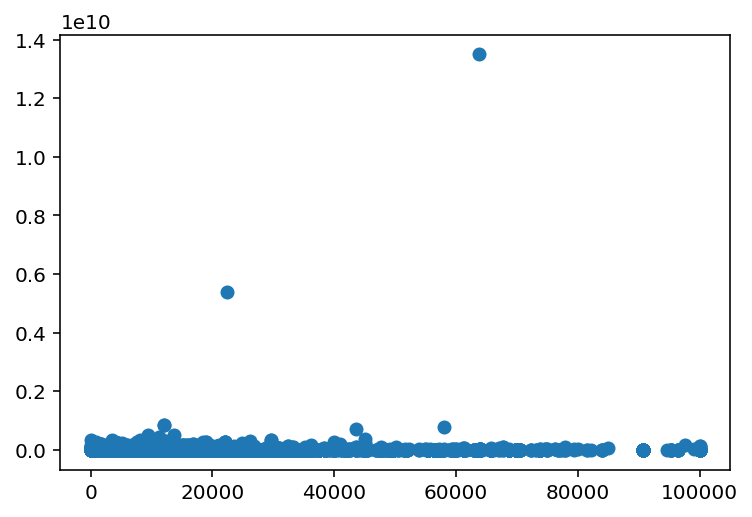

In [27]:
plt.scatter(housing_df.sq_meters, housing_df.deal_amount)

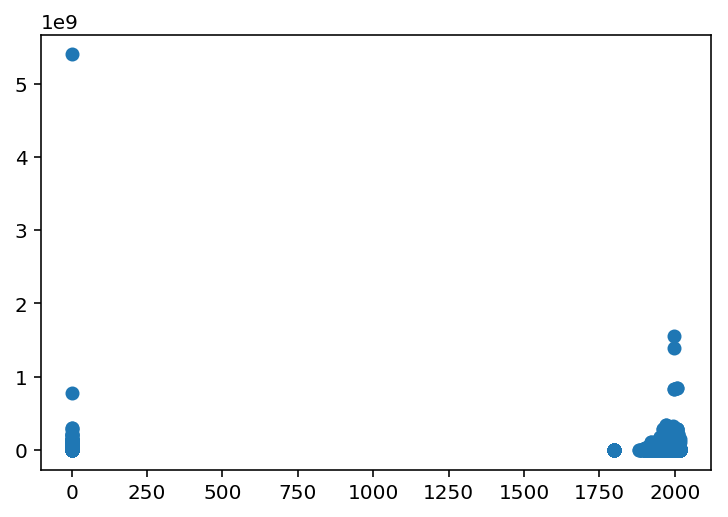

In [28]:
plt.scatter(housing_df.build_year, housing_df.deal_amount)

In [29]:
housing_df_final = housing_df.copy().dropna()
y = housing_df_final.deal_amount
X = housing_df_final[[col for col in housing_df_final if col != "deal_amount"]]
#cols_of_interest = ["num_rooms", "building_floors","build_year", "sq_meters","type","new_project","year","timestamp","floor_no","deal_nature_description","city"]
#cols_of_interest = ["build_year","sq_meters","new_project","floor_no"]
#cols_of_interest = ["build_year","building_floors","sq_meters","new_project","floor_no"]
cols_of_interest = ["build_year","sq_meters","floor_no"]

X = X[cols_of_interest]

In [30]:
from sklearn.cross_validation import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)

/Users/Stav/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
def score_mrad(Y, Y_predicted):
    Y = np.asarray(Y, dtype=float)
    Y_predicted = np.asarray(Y_predicted, dtype=float)

    return np.mean(abs(Y-Y_predicted)/Y)

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept= True, normalize = False)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

score_mrad(y_test, y_pred)

0.82769063298157397

In [33]:
from sklearn.linear_model import Ridge
lr = Ridge()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
score_mrad(y_test, y_pred)


0.8276906330711854

In [34]:
from sklearn.linear_model import Lasso
lr = Lasso()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
score_mrad(y_test, y_pred)


0.82769064238098033

In [123]:
from sklearn.ensemble import RandomForestRegressor

lr = RandomForestRegressor(n_estimators = 10, n_jobs = -1)


lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
score_mrad(y_test, y_pred)



0.49613549098946025

In [138]:
test_data = pd.read_pickle("./realestate-test.pickle")
test_data = pd.DataFrame(test_data)

In [139]:
test_data.shape

(102136, 12)

In [140]:
test_data.columns = ["num_rooms","building_floors","build_year","deal_date","sq_meters","deal_nature_description", "display_address","floor_no","full_address","new_project","project_name","type"]

# date columns
test_data.deal_date = pd.to_datetime(test_data.deal_date)

In [141]:
test_data["timestamp"] = test_data.deal_date.apply(lambda val: val.timestamp())

In [130]:
# convert numerical data to usable format
def clean_num(val, mean_val):
    if val == "":
        return mean_val
    elif val == 0:
        return mean_val
    elif val == None:
        return mean_val
    else:
        return float(val)

test_data.num_rooms = test_data.num_rooms.apply(lambda val: clean_num(val,np.mean(test_data.num_rooms)))
#test_data.building_floors = test_data.building_floors.apply(lambda val: clean_num(val,"build_floors"))
test_data.build_year = test_data.build_year.apply(lambda val: clean_num(val,np.mean(test_data.build_year)))
test_data.sq_meters = test_data.sq_meters.apply(lambda val: clean_num(val, np.mean(test_data.sq_meters)))

#housing_df.build_year = housing_df.build_year.astype("int")

TypeError: Could not convert 5254335443524453634345543455233353433545444443310344456374453333452553434244443433333423455244472644443354323545543435442233343343524233355455563343365333334223235445642244435534433453444345565653445534633325634143253534353433353332444536363373443334543353331354354345335443444443335434534324534344554345352341353435434442335335234423552463433534323544434356644455344553433333333525545443636834332353333102624532445424233433510533544363334355353335562553424644444332334543643443543644243533443345437344354635575535432424334342435442544342355655442325335533353353354455454345432347544544334452353535434433333333344454233232343454525332544623453534543362233352533431066555412345534442543443333424233334333344523536434454544135653234435244444632333334434432255353433432342454535335235324431055363234444542423545524434733533556623335353345464657343445244552363325533243143553534423644334102434234547432432444523334335364423425233355444453332744542525544246554535324554444535453654535334552344345454553534352544433455553523434449255555355323535334334354344355543434333434424643435346333453333454355533334345244333323333242446355445335523243544423455355532653352644553452342435332435554321034553434456433334535243343443332543353534463644444533454432344424483543332.602163245522545315133334363223335426453333222244334327534333524441052372535343445356446245335543525425653354345244545434444353524423353634525655443544534442542444243543234331110353383434333434525434463354456226245344234234426435534654445435336643434653433634544545523322353343773546333253444433344433243633355334454554435535755453335342522333433433333522533332445423433443324443445454445243333244554523354352254.504164445464353565233573555553524423335535454455434535355335434425333233443354344434643455635451424331424453434464634444353346553335233333324233333545343443353535343344555554345443442254234536333445314535444363364344543652434535465243333554332443132543326443555543554445352545363324533335533433434334335454335645453237454442654333456334534364454353444353435553454533223533345559353223235233353335343262353535426354342343332454424545334234454356445433434344355433533244132332255555452354335324332423536635333325444244245563442435452532565544344444542545533435335453543442345352325654443434554521844534552425354544434442624335342435444337443253424475444544535554325323434332425435244252335444443255523444433434345454265333434444335356643445234255344343445443443335343444325445333433264333434543455333432335332233443333247343563423243344533265323343344553365543224343443343743416553333343343543534446632324433344334641434243452556343423233323443544532734325435345354535443573334552534443324356343352435234457434253234444543245514554534424433443643523265435642334333443434535433224344324643454224345344444345432344444445253238333254465534443353335444456334532245543355533542435532753345452434533333263225335443653464524343463333342513233425433343523244432334434336342523544455352342532555345353433542445336545332534243333433444433463344323443234554433532453434443323546843444342324443444533536435154463243553443524543424345253433545444534337343462234353355443435444433464434354433533323355333244343342454414233454444233255534265243215443534533543546425335323633434433434103124344355333456235422333344355354433453333366355333334435322454434263432323535343354324235335643634535545345543344423443352533442554535243633535433354335454363333554543334343464445423434325433444545343453444465424543446353443333543623531436243465625333235345743455234445443233552553363535344425554353343425433464444354536324446253343663344444743455525444423343543155344654553245443343553533433424554233444345343263235343526355363253452563352554323655432536434365354463553233534343534335455433534556352336434103325563424335442533333342442444542332644332443572344543443655445353436455533544435354434552435455344255445333334535562484335333344532434345354334345344136354333464433243443424463333223433343434434443353354533545443555534556342542353345525254253523333444454535425332535363642233245644533646544534355433344.5044373363344643543254334433104344334353353555457635343544444234544354453444363524244523464434324545444443323534153563344635324436342344335743643543342243344232423326102432653464234325635365334535443444433545343353643334524434352323433235442441443345424534424344353422333345543543453324343453343323345234436464444637344233434442438224455335354353244437445324242327245652246443424334665334435535454445535353554433455435537524335833334344533325343455446635455843336243472325233432442652632432533333525633563452335343543543544364433245324343535335344331432324342443443245557633644543232242374652435463443334442424456642343453333423442423652543242354523324454345533433343643654352355534343354553445344443334554346363344264333453443435354225254324534633435336554423333343354445444443532453345434345535545544332233252452331324333436637425537234323433443735534453324524446534452355434336553334253410042455543344324435243326344545433444445435233334541443333543454554445334344763444533244234462333445644343354534513243463555465453425443333343353433262134453444434346156535452354453423545534434234354554535445443243543454543332335354443544434445344553446533414563463333244654444572543636544543344435343433425554424434435454433556423333452453454344445334333354334544545343623344534433543442523342434533734237435435625426434442426463436355534465454544243335442362454232473533534424545345683553342435644533163453443424543355533433435634344644753434343352333743753442434333544556355533243325334334534243344453534444524443553442544634325253443534334562444463742624463554335324334434535233532546244444553424344463443253344343564431454633334346352442434244153423446410073234434434323545243333343435335352253434345234253544433643233414223455635.50334334333444443543443552363553344444434432444533563543343564342254354452334422344243434353345363334354633533523734235243343442756344543553533534435332233526555423363426445464264345424333345453333533335343433332335434535333342355325233334235543432434633233323435344234534343334324335433443324333332536533224334554334343285424333635432353333333633443564533334554245255333436343344444335356343346354343353333355533555336333334337345355635344444642553535233342545343453353333243435435523155343343246243443543334324423544352445335433343244312242523443344534444134324445434335343542544354453344364443534444344434354334453434433414323536233334344345253343542425325434426433534535335535343436344534343343343464422434445343536533344445545.5052343434445412453532224243343244244544334543453433435552424433534533335525534534254655426334325424436335435533545553524455433343333652255535364343244534353447543346654435444355244356335642426323234433333444435434432343353353256245454354422343553322434442544344443331064332442553433443255446425255443555345334554345433524424233343324532625326551033331035565323254356554244354424535343444453533354362334444453333244433313442135645653464553533345462553222333343333551244332255543563335443432364243445243455373353434234444234364424345245254233562524454345463543464326845433345264335453452422433343444433534434333434533342564536653135335463544434232545435353444352253453354354425534332336434544553344344344443523333133333663454443364556223534452343325345125333422335232144534534323333334442333465353443453332424635443453533444453633343324366645544244543343433435333445346334515444363515354723325465545415235143422653232365344433444332435643435342223356345545523394435553324364432545255345422333333433543342335634354332353453338343344535334245653333334413543534564246442523335544444553343437324343544344432533337334433434324453454523563335427456524433424552245344343644332364524343443545444333446555444544444542553546343633534134243333345343455355553343453343533354352645443104333345434432344454344344233533323555565545453453344344435333455333532333635442244543254533432334435454444643445553434364346333533342313742333455333335443345533344335353464334543245424443353235645433536344445444344535353423833655322443543324223445335333452545934525454253236343643310043355455373333412333443533443245642553545522361045455233444444543435334433454332363333643474332635643445443644235453410634555432334344553441445423423543634334346525444431335533433253342345564236545363423324623533522323342244554534545332545355426465244442342346343232335434342452654445442942222433324543334445344245334433332543445531035354455342425354434342444453524343343646432354544466443455432424336345444434544223242532354333233434363423323545435435454453543744442534353153333336554344644325654454354554444534454444545253453664443333332465632443423344234463554355635652434445324333344245243435343356343355335132255442535332425442233352355332553242543244324346523555235244346245442463334433334444344643343353433334355345334544335344335355434424423434226344653243545334353623253452555354436334554442665445464444333452355535244445412433445454433454335443445443445533367334344453333335334744544443323345233435334333434444345343544343534434536335534854345333255334346335456452443542344232555342433553424634543343355434356333243527343236335254543452443333252334533433466233652363353443635334544235644345116254232333232455445334433524245463525333434433334554434343324435325424333453354563775445464245432446335453256534353233331434453464425455453252344333244334244423325344463325335536443454344633435534242535363332455423444242333524442354423644352354526344355542424432544143342433443364424454343232435453443362535543354334345355354545454245343335522345362355534454333342533544423333342363524266545244454565326433334343334434544464324231004474325454434415333534346104467465310354533423433354753454432425344353452452434436333436332533263553224563243334455336562453333563323353443473463447453334445235336533634254544574553232334244535423223333244423532343243353532535233334834534334454553544343335544355345634234444564456344545254343324455434333524423335343665329344254224343656754353452332454554454633453255533354633334244644554465454543333243445536433332145452544352333435333226235234433533345345534345543452334344455445824333243342333553245235433334325454236553444533363551035537553434634345346434643433343463533335422352434552333236254544334364553535352523246343554314344544333433324463763433354453425425346525232434334443732433444334533433464424444534343233644225353456553643444454325235343534443425414334335255445632543345344532344434435332433323583565335443464342434544354534234434363423625535425553322344534242434325444354535333332534356442345533353342432454533354345433263433524643547553333464342555345223456543444433554344224334153433334444543465343433343333445446433533325453354334437362452532625434523355453445542433543343443444462523444253344334453365342334444332325344654354434445434425444433353434324244645543445333333463425224254333433453544542412436455252423433535446442443634532546334345444334335442547234435245643443332534545563443265233344354425533565443224444144354333445444436433345444424464333245322544444244435354264355344434426454424453423233445323253444443326235342222532652362335445423343444445352335333542423654103435232433423442235443544435536534433343442224533253314553333355344232344433245325353355242544343444615352634436233434333354556323345374434536324454344263453334255453642334443533344535354353432463625352445334453354234345352344533344433463443314245533332352223724235342533433543543413554452346343243353105454335453533354433645458353535353443534253545453545553333535244443334445343326343435325435445333443454433254343243553443244454435443533434353356344525344533442345565544465634353644334434432344434343323342334343334344534453532444553422554533233454433343524353354235243344333426334453656344444335323235414444535436433332343364254333432333431252353532433254104333553331535254235243434545454.50342334355332433347545535333443522456354523533434463643333334344356533344453533434354443453435533333333332343364333735352333243553435533353522442336333434444434424235333343335445642334453443355835432333643423235644645345444264343432253333342324445454163436345525233254353244534365634452442234323246343534543634424233244434323333841444435335534253423244445445410535323214432542333644633423345544333534353343435534334435423545444343234455332422435442464243232445343653342335454542633334535463333434443453634344452534435333444184354353533355525325432333653543434542244545532333535556142544525533344545653343533346443445351424344435343443323653443414443223332442643455443143534134454103573444445436632253546334334332354442433455564563242555543365333538334244522345445472335326454633453453413224353443334425435353542352443434534435353363433555452432434343444335444465524545535436534443543342443543533623434535315533545453353555633335433322345323444510333353425344535354333253343444534337433454635434343343445353334353464563354253335434462324636734443435234332366335533413433235333354442333334444534262235433634354244323323332343435323542654533357534252433365424333245443534443356336555535442533334142335434455434343415364444532455455341435434532334533543536433783434433463654424533333444333355444334434344525533344434623433344543543453445433334434543455234534533334333143434555335434525432333534435563545344434343334643454444444444834444445223135433232534453433223224224453333345552.5055143334354332434544534433436334135343344443344465353345465234344342524453224333453542555343554664243436434455533343444323344243444533536533344324534343542252254335344354552364545444334532344344343336453324525435234534334453433444532552252335366353443525344253344344532524453342655345333454343361353332424535636425544353353441554533243742344433335343424234324464433333423233434445544445335653434443433363423453554442533432433433463424435443655334365424434333243348335433325234434343365464245244443554347524235443443354445645453344556442232343742324434434524553333643544443383245433763242244343433343433456733435536433232422933533436555443435545743343443534234444344436433323233642433447243333443444324454532435353533453354443353444563452534724552353334245534443434434323443343532433334333536245435434343533436424443153333445324313523555245333222354434525432353334344525332343445434535623432433363335423333234425445234435443354335633344653532542346334254252436554332455453565536455453536524546343264443463344425533344354334434433345444433355364454553344335343425233434435246332344726354443344425433345484543453643634253433363323334333343423334433724355353425334433446423333344443444334222254463443444455336434525343444354333564321323353336234323434552545443234444342535426232346433533343335432444544435635534332433232353462243432342264323424433632366354335424555333444344543335323332245236336543554334565434553510723444343343355345436445455344342454434335433473345544333433325431043343334634433335324435246234245543642722333246333633234344333344353624543333752254535365543344443643523224454363355454353455345433442364346434432324464442335334335435334222335535563334633345335345423335344435445456545355353356534433343310443355453352336354543233245433323534544535442635325444433523334327344545345454353343526444453255434424443335336443457335343353434333434552645456354534335535455362446534422646335453353522444333254534444235223263343554434445234634455323335425445433332434434355434243263535335533445445533432733443254235544338533633623334433334332333455335453632443433422543344455546243344563346433433444555423335145434443225554434545535233335334433534444443542365244344106436443443335532544435334434335463543344445434423534523333344424433434644543534346344335435334442434435343525463334454254534336335643512345344345444266434243343523543533553333314464335544334434435244554425445534444444343434244444334534425423333552444332434535353323264355452444435455244353433344546453334343433642564345433335455424543554344533554435542553432445346464613463354453343455325443235434335334365344254554244435454643332343433433453453433434463443544345535354523234242354524336433455254333634334453433453324544232654534445655534423554535444365436352355433554333254554632454444434544246334545533346443343561444342333556358433463433645653333244555354434455234433255544453534435533532335345355345332336444334255353335443353345334242443335234633544334356423253233335343344343552524335333334333454453335234453552345443424345334664453363444334446525553333243342534584423324443334343343242345543335622645424545322533345556534646353334255343345433454443543443445442342353445235555862444454243331424533543363443435532434423643433254454243544345344334223436232452533483335343353635343542543445423342544436233333545356352462243433354534233332443225455345433544443435353435344332437210544345265246433244345425465351446335423343633332332554324246432554332336345343542433643432335453454675445252354525442343553443544442453324344233343524335543645545344455442333433325243435432242332545435454542563553444444435245433244635453344546466424455535244356534554557434355532544454453333546344646455434535344444435235524543245364735454345443366556332432342434154355355434342335524447443543634353226535433344535253435433352345455638465432425344434543383443544434345534343455222345544464342442334346332534424457335424434724333462444346456436433510843555343353445344523434455234528345242333254434553552345342565334464442142555323353253444433435353334346333435335544535234456333344334510243232343343343445444343462356345336644545534222533534333533224434434524333232213333345614453243355423445374554354436353465534335335445532444345453445324433315343333343444446545442352433352454633343524323443532553544424443432234332544355422425444332365455663242444333334353445436352433524243433435545353734333554334323443344443244564353353333444455434545323554334335532534336445334445434436355554443444334223355553444243444454334333323324242455254525436434343455545344553445453343233253354544433435554334334473534333342424343343436353563342233342533543333552554443243443233255345344633532413662344332456443443353633534434333323435444656453433434263633364434313323343434464338546335342353756432444444322456343445346424533535321354553333643352333533544535455444444844524434344336353344533245445333343423344344653554332334535552534454332533344555342344224653254535444624523344334446653324544533243454432455434344445424332535453562543544431052343342345223534435534533245384432454462534536548343323452243144375536335433556452443253535532244332326534444534434544333332444332353234234444554332354433555615537433433443443254334463523352642353645553324345634255335435443445546356244345425345224235233243523544525352224444533335633532423454454524354454353232335553325435434436353524434344535532353663335345342454233545425452232344645444435254534525435543454423434342555452365435534253610433645554344223363352344434643543334532355454535254445543343243434345354435435345464322434423434424454535355343343553425545225444453563353343523323453355424545453333433532444366266334333536344344332444443354333335433334344564552324343462244225543513544533532455444334435254553543443344423353352623434545334334254335554433344645572524343235435542542424453323353542433536534433435344255554321334663343244432143434555733333454533452543534444554253444347432336345553358462343522254334333572433153332545631343445425553525453444515434355543452453625333354443344734445225543443333354645343434453553103375443374333443423335326353433383353255443444436332833435333356632433542445432623465554342443333445344357634655425225463334535354235343344554445535543442353333444345523524454355445643442433553454433433644442343432542332416644335443234443544255333344343646464443353536345337563435434424445434652355114724334344433434344253444333352344345463535323222224233354455425545353346363435543453434324544433345445332344243345433444345324334443335453365424335453244543343433534643433633544344335436534542103433435466235443334553345452533333136545333234336434345533334334254322344635443234462534444344634454534434533235253323546345533434322536443443344463454445334233343353463364343442253434353424424223458354435333446345532354343366345434345344244453515435434552424443434445335354243336665465433524645733324343534342234445344345633352343546544353523535444561332344226534443443543333334534433373510323444355253433435374434443443345344543532355336534334352334433346657214464344424434443344543232352423344533543433524444542344567553255543333463446435443333236342422264462433334224434343545335351343433546243545443253424454544343354544334254643455454656353545353545234353432353451444453433433335663425453535354444454433154462553334255352534223352243443443444332334444353444322454534313443444445455533575454642553343336433353344344435434364343254235533643454554563546333241443623352384752452225325665241535433434424235633553333432253410443333523443342454572235453344726424335234445354103445243354456433564442333243443344444345413102543452334444444344346553243443634445444333453333343445432543342334544445433424445234354534343354643332253345434333323435444532332643353333533733226363343434343345455534333453444445533343422454245524255333223453332444342341532444353443433434444335344532243433342633536244433332333442342431564533233332652453314436245444224335452543435543333436246334346545355533344.50542534545434635234333434532644356453333343343343235434543445234255444353463533683333443634434542354462445424525453333345453446444425454343524242443364553233646344535424353345333232453563353333344434445354655424241635354543444533446462523324433443643344443234332323537535455435353457634643335534234353343533423535533355423543534343433554555254544434346225439384652643433233665433443335335434553446552214454555443336442333344543653333423342543674253553356631047342324644434535355553444535553553435433635343345425454423256463454423433332453455332433522432333423314424444336533325103434342335463223315155263105524323433264334243225342443535533335353533325345332353245343442363463434445544425333353635455235455575353333353463444565663445553635334474433442442333344432554463343524434555374353434333354553223344453523344363253325444442346323424324445254745562352334453334434442433432323363337442335424354463454354544334445133424245433323233333634444453444435342444354454335335434423544454434244533632325242455436256454454542443424433345454543434363342553353435346345344433454434456353455536333625253444353335324532335554444554433644356652233353334734366324632523422446565344344423343443555335445554336625353333333374434455344434342363458533434345642334534533366354422543432436536443543444543363452555423344232134433453335534433435234425536244543344554423352353425544453338345623525331632225324535434535344534333435356536335245444243353123334475333455354724333644455545355823243242424245224433434322445347446443654443443343236454243624523552235443354344345336352344454444342323353324345233335445434454253435345333243538434233463355323344554335544523235535463542322433355443542254351453445433535345333435353444334533355333633344423337342434233544543445343535454545335352334533434334354544344553424345255344225533323384515554453345332352524644525454346353453434444353334433433236533423443454354334424524363254453453433356453434543344423454524833254644444832355344343343334455363553552434334354633335445664544254564644535445334625443634414332443644434543626435325535636443106236442255535333533533463343553355263334335343425343654345544423533373296442345645334315434644343344745442233245545333443344444443553332343554342535442535333354325243454554333453354546355345444452524352234334442234353332333335623542253552325325524335443534354553643424254432336323345513554233363435653444525533536543443333225464443434354545433334435324344325443435434352444335244253453433563454334435334365435443354343255255443543333453356244325453255554342355343335344434322343463613546653546325553355443553324442453323263455253344545322443664534335423433454345654533322235333425353544333533555444224334224253524434346454454353632433434433633423262435345542353346335533323343232534243234242442333553445344447343434453533343534336454443372454223645445353324443634343543453436332454332264344354225355433325334534334325585453344454434434255335532352742443232553335536645447245543235553325346364104443322533333334343233545245344222444634473235435333573634334326644331333633434553454363645445357645434353235342252153334364444325332255425335333535445544333432434345442373333254343545356222654234454333233453443445435347444314344534425334444463434535554244433332122554415443455253433332346653454333444333324433453243347645333435335344354334363113245443544333652355436344344343354552434326543353564353564337335542645433443433332355433444334334543334435344344333323322232352344333233323443456534235454544364363435454242434463553333334446454453332554454444352463554554644422335543535534332543243552256324424554353453333333543645543144342354353243335523323437453444446464344434234443565234232344433344454433455543434536334343333562454336342343343443433431345334333553424646253343446255325314455455334545453443333432345347243423542255333442334423323335244144556334443623233354444364457352433533104355344544333535522555443422333225165333534333544542363422543444543432633333252625554332442343445344544541443534637333354463553365523345345224543534436234442635253354355344352554434334354433354543234413433433543344473442435334528372535433353443233444427554346324656364365344454645263354452564434623444464334442546233235473335443433162234453354645323444234252433324553525344452533624332324536442344344432333334266224434543344234335522444554424453234577853333334445235335331322364334345444343443354343433334443533233364512364442434434722345553554234336433842333244334534361434445555543534443545336233334342344445254555334324343343224233343533444346453344453332352334445332534453346563426545344624432644534455233422434554543464435534544424345455345434654412445553343435343322533533343464435732434355432244434443233443334565652544543532533436445453324383432563444532544433223655353255633534456435536353443653343463423253433552434534435255435335443524342554343324541345383443344445644443384333353344334545542523437544356235434455353433343352453336343346544333354333365543444333335632653453544332443554344363453344643245653424445333343533345336344354333334344335354452433533453443543433343324534345254433536553335753242445534453323352543343234947425444554555284434433465344733333245534363334334324364244544543435343343453233343354154543634134515335336333345244333445343246653433535443434526543445653345453334536364324824333445432344333454534223553444442435353553453254323454532463354633555434455445432235345253424443464233354343464454345356354253543344643542554445353547445425453434333225246534334333365543344234243553535333433355453353436444535544435453352543425334233324324354434525343445253245664103326354334444543343464543423446255444442433445565473442454443235323345463334534624334465376253323324343342433343844357321433542426433453454513532333443334543556643334345531052371343554563553635426458243435333543323753533533356645443243434334315463335233332423543633345534444553553564445354343442343365444442445333234236355286532454634535353333443234635433535343354535245232464222644553353372356533432535123533553435362333334353433454323343232353534435462542544343334348545443353354544333533444343443566355153734455353355343435325534424456446533233344455253455455425445333332263444443255553445335444433543344263355342343234335254235353254465724536554344343473434247444325543543355373553542443345562453334533543452635544433353435244365434553342534632532352443333522335323335453233344642345533333433443344373443244543444355324243433445432444633633524443344353342254545433335333422453243554333463445354324454554456534324254244453546634222333343354453334453354325444444433533343343533534445444543542233556424653343245334333343533332233553333515542333454443423463332563435543444534425365525344443133444433434544333432543425534431064352546644454443345365335565432334443453363433233432323543424375533446443355535552533543543444444423542244426343334544544334635253323423454433443453344363354354252442324344523554425565244534456443435463334552733934434555434643543423254643253432324510534334533354434453253624443544222324244343354544335445445334363345542545533124446444466436332523444544463433234345335323333534533533463.5034553454433434435535333244425342333353343443545434264466433243433424562443255433644533255253345342435346524453243243434535645235434463323352142224334243535444332543234334444344422445243434333435322343534745410656344234523333323153444344334365324343255233354445443455344524333324225334443545764354452444353362546473664553334365343142434336444335633335463435543845334343344433335443324352423335433435445335564253233444344453654545454334353465338324315335343424543333233424542544523453235353426103256332533335432313363644323436154632736232442434355235544632335433556344533345452342435455525543532355522323653455342554.507444543453343324333344645425442423334225433343355454245344334353452535335333325443643454353336425444645353423245443244453354443335625465253635234434534524346344355554343443333533436542365434453355355723623443263322336343733354444342335332324212364533434633341543534345434365635334444324344353253235452443343435633462336342596453344433348335653424346234442622436542434533365563221053452334335332344255246535443635462554354333464524425554335325544332353535523555252624544335534346344433345354345364232244344.504345344354543434642533534344324774354553364335333344442555264645434343354334474635354534453345334334343453477232333433545535545353253645344253243225534445635545575235323344354753354343243344445352335345544433533544653445343334434323233332232235362345464263335434434643332446434343444265333435236335433334435224410344433433433333435624445342546334413344454334453365433235334443435441354453232443444543444333333345455413536348343324455243633245433434345335333536555343533454243325544544335325334344523435355334333436435423242344363534534335453434244433463223324434342346334455344544336233433445435252325364234354554348554544610645246533333236434534335455534243654543442453655233543365336421356344214234454354334344353345455454363243434534355234543632245653435444363335332455442654334344243352333453736543545534432554234453533463446553446264463522253342434354454564634434432343436323423445443323364424453435234333345334435425543165334335423224332546445334434634554353235235432364443344545345545324584345543455234435432334323463432334644344525243642382353535463325434434452544465332456324443425472343355434435443344535463363445444453433344364456434424144343432454344344425444434543443454364253334423233356534424453745635432433624732424454344333336325254554433421335233525435444332334342465435333333223443233244333245435626463574542425273242453333253336344423434554543554355325466525545434544624234342452343343534553448463545325443333665135324345235542434424453444343645234435534434532535653534435546544544435534436235325334334454343544334432533462444635243524555552223542546234351325555452354645354333155325354453364342453444432434532544564445442333454444332425553422346364533444443155435543433344235332325443444634433345245444312224444444444325325252424314347565645445635358434623432336682536323652344342523254433313334535434455553452323334434353322435343433546333322534244343433353365433454554444443432533623455367435455333353442633455325254433433553525655323344544336313354444642653433352434544555465242445452433453234544515332355447423464534643443345433343533353463543435443344336333233453444442332533344254344355323435334553354456323533324643355545355443433335323335433654456133544546333334363353343453452355535324332354545354345452553425534534453455334445454324545633444424263434541343343343444104541456353344433343344544224423322244433645433543633325333233356334453255345333332524323633534134452453434443334132374332456246634236555443334334435243574343334242335533104453855434352543344344344435453453434354442443253532442523523552334362553343444434433433354375225455352543445334445242534533523334253534334594353345546333434433334335432443643173543433532353343533554275544434463554433362325234344653344532533243445542335543544433244338434442333353434343644453422375225443232343454332623437424325433423545544364444353553334555242435253323443444345534433354458455452335333664443554526434554463356235463534342423844234354324233433545333455232363323343353355555553435355444435444234424356463534463233344543364742532443355433453356443514243244545354532544334544534364353353244344344443645543432543645535444446222534454733435343433532434642233443534233433344453454333455232434335244325265344352345353433624434333242334333324254344333335523410543436356554433342435453454534454446352334634244644355334352364543424235363353535443336525334454545245444353332453481041243454343645544365252233355432452543333333334544434335543455335335335554343544344433335165344453343443472534654543434224545434333244434443533333344432455446343454344433344424435433435643353313234333353445344355410431044344457433634455223243435535343433344535345342454345434334453264334332445354333245422432545224444466453444433334554324245333443344364342335332333464764443444344433553343343535234363362533334294436352104534343442345344543536333244435534265466353544434532143344443652555453534443546334443453354523535434245344423323336353543335443442434254445244343656543234353324242252554663245433555362554465314552546265332433254333546335334334454252533345343551045444434533453534544354333451545443654545523545332344334235564235352244333232425135534253534453533343332224445435445334434543323362433525534344234243533334343104444465525244563445536334543545464574444434452834535334334343725444334522435545234533244353544453446444433324257410553363232333344335436354243451524435353454555444363363325223444335353524633333233344543443454334253365534524253544332455432735225223333353544534445354444442465563426553333434445643343535643353343424432635444847443533435343363244444224353333643345544235234434353235433454323355323363353355533333534234443344453544433664565434532336563333425352465444434353444333433443432434454453442553653335253555543542443343163355434443343623532454245105545322355344343335554463545325333333245424434334435325446353254355433434544333434452446645534443323433546533433333333332533332334345445234532944533454233543433533553444534235253635424433343433243534435533523335522434552734343264423344324335534463443554533334534342433264344342552343332334454344454.5043544236354457335354333344333354335344423435444443455344443223343643243454375543234445253442334353235335462434342232474426523454442533333455433543245234363324345353333443345644344352555443235445534323424342345334243334343434533543964543344343845444643453433452244235324235433464244473344345553433342333443444244455443345553325354535523443664434447554423353334432453453343234364633344324534345433453244255243524435244435444433443564432444554345335454544545523444333345225535553234333134434332414422343444555534463631344262543445442243325255455443353244433765355535335454243335543256533455444344365434244455434456324255435564523243333253453354635345434435535364353553343435244434443455534434475423433243433434444333355543326332435546355233333459343533352463332335532234454433445243333435254532652443643435556445555235353576244324334252443263334443344255444433423634255435344353352326444574532374466234335343422435524437345747342333454423103233154344443422445354253344534435545434443454325434644234444234435344634565333233333643435565344563434543523325624563334233344435543334343424543374543433346333572445553345222445543354543453344532234324333333323444353565445243345533363335235424544341042432455424244545244325524235443352552523444534455335334355335454243443433343753332342234443724455245353434463434443543223433634342345322334432535334336435423545244253324344232342324444423352443434555553336325433433332445357445234414453544245634533445444434546815355333336254344351423452465643434433352333233324234333354333444344543535333743343535335344353336445243445533452436435643222365343534335433434335335224432433354334252534536542354335454455465343534103232333424434345232342634455443343356224353435624324544256534432353462335455344344325454353534346533245145104443535353424334442532553106344345535355455544424545543434443333354433432354445362434553436524344533333256322335534446323255434343442555543334333444544341065434443345544555455544135434553343553442245534542233343364532332356245553169144336332246446553453263353243464443334453432343546443323834344463546342345435433343654335233333435343153443443345634333323233653354345462434343334443354852445343522254464444543434434333233452523323435544553333454453334345545353525433132433335554534244534354434445333554334254433445333334344633433555435633336323343555433464444432436554333334533433352363643454334535433553543544463335333434425535334333453253334353332532433544493454242534323545433423543334333343556342343422255445453275353356335432424444345544443555355645225424323543353342332342343662443334253375273444336352424565344235453244563534335313564234543433334333432432435654344553210523445224434243553355443345442334363536334454532354443323442443333432435523454564334453434342345323334345256756452433435553335364555543454641024244533536332352333323335434343554364443544544445434545343332353434463225354354335432233535563347524354234353336333333325544444442435344444335323334565335353363534232443537342343352253543453443433332454543533443623534463352235533335347423334364433523334534335343463343233343353445453535234434354532435341534433353353234452452454424435224344513544334324355432362332314644424526634535444452384442324434324554332345342334334533533535244533554335325223435335443253224434345566543332573233633555335535524633443344444645354445332642334452133343526265436435633333441355434432433644522325344334533342366453525444435265434543353646543245423432544254655475522455554435533434434433234634543234443553543105563431324343335464343353355544632534562431453344444333423535545333553544342534434223334356442433435446463346333323334343435352453253232366343443346364545554436434243353632555285242345532234534333564353342353553553354553553532545256244564444423334453434343443542434326435646341544345354333214455553354325455234324352345353463434334443235444434433344444553556432544454643243442323353232656323354235353453343525444325444542334123355244354633433555410544454255253353555434435342526444523445453353335343354542442543352444433332232433552253344335334443453243326354633355344346523435343355455234542343414532344453543333334434553243444234333434545433443235347425456432433453334553332424642422543543344342242355555234352345453345443344324625545544535353332334553443545653365355635332325344325352424445563533335435443343352354423543333442262214435234454532410055262435433354344244342543454351336425632314454353549424644433324344433442354433544443143333354544452334343142534352446223355523554333444458363453133246454654343444424335244346435246532353444455234433344553555454433555334433452452343334543335634433134544535443334326353245533433354564423653445535435473743345234545325654324553433343733343434434543324432624676343337534334473345354543533255343224431523322434334435445544335234333543435433262724435334433342533544642323345453273544324434553346343343374432455336433545243233645351034532345456635343353454435544354543242545354444444443215333232545573543254453353332744253552643544334555443344253634444344424442335342434435424644334234345325344444434533433244443333434553342433523433225233542554544544353325345445343264335153324544533534436437345424644333343244534632543455443262654353343433323353352344334543335436333633345434326333246344442432333444344363333335434441365232324443338444332451022331433343431543443355444433254463434443444444245334244243521062454375345353553443452334534324353433352433534433233437234233634542435453644410444342355443434234335325555455445423433654533555434335243444535354635444453436355336423454456105544324324423653344454333353424523244334344434243344433623343343354544675534522462534444242335243554343335535533343353335243642152534444335432444353524332433332453364535575435454653563323564434353435453433333444443542343253554453333335433432523555434335333545465235234754553522242534442353334334353473242233555455342534633354431024434635343444434553346613554334535656532453334443544335354444254345354343525353325343455655333235242644353334335442343333532332352442343354565345244333344446546366442335532335223384253333232433555323425645344245443433355534544234454452343434344443243543534444333537513434454535544633453223544423334435354344334434134533224433444442355343443542333336335433325342244332333324453333335146445335343233334333225344325233224455542534522445351334443234334334234544434364343366444534334536243345436342536433444535353343545445555344324333433334343544343353423534433523332623533525443443334324464453434223443563534354562223352435443345434351225434342535544335474435333525633242434344245315553553364457435333324345533344534543453344335242544633425332356343425424444332433536343423324354434553333434354434334332422426424332442432424363463434556332514335334233533454355553343332343543342443233356353454334444345466421353445545633434564243362544423323233473354355355255333522233344555432253435444334435226554236643522344535344544433443454433334524423223424454333433545344634353472433443255444334453454344254523324453345454543533543635342344456434534334436463532633433235342344534332254223434334334538344554535444234343434353334225242235754444346134523465154334343523336332363352634335455355442344544462334534333453353443345353434463344444356453333523332465354365335544443454542235335443433455643435333562333453432433455444553235325264343544433433537532353345454436254253434545343233645434334374542443335433442433642533333543545536433213536553534354533464253543445555445432233345527354322335445435342446241433333546443535644443344252445342444233435445543335435523463444464335334557233534333444634444334555464333323463432334545466432443464533512424535445444644355331143344343355165252523354322136543545253332235445336234324556533323444534343433574333435333333363323544235434643554443653435536437334263544435433444444434343543235444565213554454342364343454452622432543854347424452343315634333525425643445335246353334535522453562335454554345453444644356345323334443252422144342433553233336533343523335523335463434433543645554534435454524255554535435435435453435453363532755242333332434435253642543335553433534343453453442444434325434333335341452553443433232333353454534434523364345346343625355552465454454443423715533335234465354342255634433455452265344343434354353453253444552545534333513533453454334442452465424234324233343354564531333232554533444333334244333314334373334343355545535345322334355343443434453346335355335434454442343562343443435354552432344244363254255355533334235453433434325333335353353543453622426445353443744443455234363343234334444345244321442364334335454653433533253334443423443454334244444453345543544153254455544322333523333333455433334334334633333333344434344345364433655465463333337335455433543343466332444653423353443535253325346332333445236452463255526432245324333344554433432326454343233454654453425663354338245333453752434642434534345744543643536334323435245355454454236446535533343323243543355633344432333431055444344444453354535355433353544436343154343334466322546464534343354343345333343523344475535652234555356554543421045332625333345433333433543355383423525433423433434453234444444344342455444635642524332442545445545334323443245345535533234232453464234323453353353524554256424335534433334343533245563544553444534354332235344343644234344325364443353454433434454773333334424345535246442535333226463333453444424325545444444443254243433344455314334633346433342324323214544354546343455445343623543535465533433353343424324263445354642253443445244433552554335445244335455344454584353335532235233535442534323362634647534343106433574351424253464423923434353674343343454544652445435443563355315323323333445435324543333334435533434443334433334453534343243422433343435435454335342335263554343443354333242345453445355331035424433433343244242434634556544334555362354433645323443353533455434452333443323357442333345524243443353443533324344525445434355572233435334354643355233324444435345333336353443443334564553344544333334446343543364453554553454343245354454343234453433332444433353435643433644443354464345455443443533442534446452452323544326144443435435513463553354352344323453752555433344524433543341443456355544335535233332554244544555525433132443544443335334464343535455535454344433344433443234343444434245335334345433434332646534254742232443524444853545343323433434322272445353433423425336444435345343433424322345542345355624344434355533443543233533443323254355544544443256433445435434355563433453533325545333435432363642355256444423746225375344453344543264453245333334352335555324445344825353334334335344327335434333334335455225432343332254434434453342542233533342433455353245425446655543532944454444344544234445544323234554343444255444342433343336533543344354436353383344443424444104665353533465564233354324434433543553322444437254425224324333353356553422333265463354554553210334345353434343443554344553424422534654353334443452455355245233443334355452343473445353443356343335535415743533535243334634224234364343347463443462335465452334325643342335335435462355443343442445354343455354323564232336423644463252253435335353543324435344364444444384463745452333346462543455436443333333446446232436343331355445332374324344554334335254433622333344524343333345344243533255443434333343343453555432334442742433545323463344366534453344333434533343333433322555334542325442344645441544353323632233433343434534535433343564544335144443364436454543245423533445355634344346634234234464354432234523144444455353736435353353453453455446234424344353523532344233344446223444534535242464322243345145423544444433545236333334544454345333542332352224243346643444433353452263543453444434453353343233345345424434344433442434443533475644435443426453433553133336344335444334334333333456364534364655635432545655342223224454344453443365542734345524333425454453443463323535455434334322553441424323245335354434432563544542453353444452548534545643434333435523235535353363432345454442442444323724343334644334535322754433437263344243565463553334362343426365453545363436485463343532253223353535253222444523442535356444333233523342534433244533424352343334642344345346543454453334453445534564322242545323535334325233563553444435332333534644242245356536423433532335445433343333334334535563443334433342854454234563353455445444523435624433454353533424534355423354434352333334635333332536343454323455633103334352233343463435634433243555355525336764434454854464453441454446410425355343454545525344425354445324243556243532533234443445536543447454435354524343444643524432344626453243624563354533361523134333234434465334653434355332443245354542343435465334236533335633434353724433543444342532543455344343333323663555533355536334443343334333434355358644543552545533235335245565444743433232333352543445535343354325444344544443534534543433232433324333442343463563442534643544533352332354255334644336545342434433446644534545244133435533544372233332565653323445353445335334454457345543334434433244643354444354355533343333453443232363522564255333585355644634645343524465434454233553443234434446552464634343233345323343643333343333244344332453445355245535544235444433532334534664433233233635453346435654335435455434324343333553453445644515423444342323353326365432533333535446433535543334544424435253354552444464443543664466333333633373544532555333324544433431532653342233233333332433524554433345443345625444433356444454342342465342524242343464432353432333455434335535455104315445342544353335454242555225433445345353343345533525437343525333345234434333344463443352544233453333344334335544455343345443333552434433544443454544233643341044434373333333436353324442454335332436263564445443344243344545432354223544533445343335324534544332334324442343544453344345534335335356334333554553444353553635552432333244434434443323455443365422253445444253345433565446435353333352362210334562545333235256445223543532444325354345445653343543355245445334544565332552644434344425453462343434244333323355235342553533333534523244344532255255534622254333333553634345343465564344354444433253424452424545444425543335242453533335215452353533325544343323363244342432326432362425443535534323556334354432343542545334344435753354343344333252233373232533545443354243442435534444424334323225354415654654353354544433345255344535336435352553345544455553333543652335533543344333343543554534354333343252323235424333324353324443453643335443344443434543433345432343334245562455465533245364234554443243355533434652554432232452342344362535376363433432333324353245342553353342254432455513344443363444347333333464233344333444365456365433642554743323622342343423435442233335444452554454433354343454543553234243154334244335434334543235432333353355543353344333343533222553435546445345344243235443444356253565456433723453354344443534425434455325443334533432323552343444355334353346443543333222443535453424632533333266444235536454245445344543444532323643433345638544244243331346533545453442655333345442453436353344534433106422335534324545443525483334374332323435564322354425252335610014463334334335423353543553544353433534545535236333444333353544334343255232234422443454342444334544352424533346444221533443544533542242443643543444344445433243525454443273354542322342435844324535435324224553334534324324422342324544542354545353353343433346523535333535323336324546534445424343354636434334525363325243333333535454143434354335554645443444331533254424424333444322446332326635624344343525435533233333434334454653543353225244333436534545342345824334542423434455446555353346545443744325262444454366445734353343555534235444533524353334433365653535532433544344443455353463455343333365335444434445445643443535534323533344733453610562433332244333343235347331033542324455642553353445464525334234354554554445345656453336343533244543133633344465444553436345244314442553434562433343633432445564354343644443352337833234234552354653100324436434442343533554443553334241345245334544435454434425442325343433355443333434544334234534344332542445133822453545236634454355614563434343445353343433433234434332351042545453525364445543344533444483436434253454434335334635233242423433444446373353434534342633433645444633412433543655332475244443255435554336455455451353334348333442443353444326453425334533324545343642545335553325443143255332545355334343343233333454644234323444546145353644453565345333433253434433432833445442265334434335473242325435445533554352455444542443344354524434453324354545675325454434446324543534533521532344453534563524244432342443323334354423253423335263324336354543223463643335364225443365353431033422344643422333544543365455353345433453343565324245243453345534445343425444324442343645635334444335433452453224465434243334434334323434645435433237533335334446444353343323542435433553433264344425344325633343346442444334443465445435435334535533535333546442554363433533243543643335434345332542624444344423735446432443453652325345352355334233623443343455333534337545432332454355436433556455343463124436444435556352433423364323343444265234524335534333363346473543353533634344332333453352454454524432436454332342533334454553443555543344345315443535543433532345554564543435443524333345543553346344333332334335344434434434353344343354432353354364333333344823744443373535333424633454433353364344333543453344753423423453433553433425443633335443444343234233446454345424435352433333253345522542534334332356353445334434447424163454324433565443544445532421012532431445634334535425464654445333423656354552355343434432344443543543254454342535355532344243354443232332335345445223434461445454242265533252534334355435543244334343343535343334334345562742344525433323343376533235243345452434535323333334253433545753553434244234433432356563342424542525310433532333435343453435424454443444234342345445534333433546353633544543346335516324233345334743332454563644355235435443434344431026533443633462323333342323334434354322234244345523531534333335254333444232343556543524435313233343334745535234346364543413436334335533524457356543334253234343342554543254324232444344244544334543344345433245544552353344435645244345452354554437325654532445364453342477444233554344545533246364353343443533433345424553534524533554633333352342453443344544335335264532334433533452563363354445433525424244145344245341442244343445444534333534255352441454534535453344565474546344444235444453524243444643533333542464454324244633444243244424444143545553353744443454646545463512354267146342424442525253643422563465433544434323263443424254424336224533654534445335433552436354423363545532633433353433443433334645454444433433354444453243324344545632333245262243444535334434264433463104446534335446545343366313436334445343334545434333343233224366436433454353333535425553562445353443254434553255354834434252234645234264233353344444434235323545543353452553734553333435544434453334333343633453545335445432534424343453344333334445333432634444235564534333453344352444545434333410435442433443424254344434222533342333342543334243335323345335424233345342354633344435325334333734542646444533454333377345533433432346352534523523754353244424335422263335633333335335442344653434453533335334445233355522534633444624535453436325324432245333545523433644542252453223442534254643425354355223425344344533433454533453453253446432434343443534464524103354434445323433335233536445254524333343534534212543523233344454443533454353234552543336593633534433334332273431336444534344335426543345435353344434353623346455434534442533463343443654435435322345334334452634343432455454332533333224345553343422433314345333324443544345634643331363323465533553444434335663435533453533345254443553654242534654245534544344442444432464524344633434234345424424536333324343464263433443444234332344333344332353354332545435823335343423545332344335252355634533334652544334354343334534422552534353245352263344545434544245444352433632663364544223455344446454466454445445833352232355444532344410245245345444454453344644455355545354324344535743346356433334334314364653323252243654256532444354534354466345233555234435524454465435522533545433263335156342244533433434354555543533533345542346332655544533443573362442533344345432154544334324425553545535245235534253432555233234532452335437434444245343443455544423533553444346333353433442343434643425336543346355353342253354443345545353542543454344334324463364453354344434333343532335433643223345345363244324333255454535343634323652262543345324345563333345637336103423333454434344544333354455243543233455555535544333525443455365545354524453443524524555633333535442264353333633355444332545354345425447424542342345223336443333635434355553447563433335555353344234353412453545235442433436432334345444334454443364354343563343335222536224445537333455335441344465445532344152435346443633545643434343435357543323424425354445453442322344655223354442457555334467433444544442534454324343463444445344658542431235323525435363355255543445334466253364344324345445333434535424446544434355435342353334536356334343442756423444334535434335554453536326352243445452333554443543234325335533442453553625444437555324554325333333614343443443435332543394443543333412434343444343543335452444353342544455545542324345442333473434353453443533644553433253633253333435533235523324423335423432673355342553332354455434244532533453344422635333245431543432542523345342536432344434435234444533243344351345553224353632422342654353423456433357345433443244435233344433334533234233264233445352543155234335363344433234344334453343446346433545434355534324434444134244334435257354432375454454334673433346333654454343353454433335453433222426544443346324454543552233244465333434344323633513555325443434643433432545355344333454533443455524562333472335545464444341345333244.5053453542542434353134332325343554332242545333533545445525463453463323541443353533655331044452426543322243546345435233535325442334105446465223324445534442443534534555333443523310334345524333344555322544477556552522775365443443244435542532234544443442433136223653553455335344344375543353433534235356335435245526455544154322344434254534525443635425323332333423545842524343334434254343553535444424445334344124435456335532333232324344344232543445344344253345243335542333345224355433234542343345344533554564537354334635543346544333343243444334341542434434334464324243465553533433434335543335343543343336534534243345534442335654545442235345332543435344443342343554334347533424422534643353365344564644433425525223633565435333365653333455452676343431633344333435424734533633325543344545456244532353454423532335353424533334733235243325344453345822333554252554433335425563526563634421033544355265334543554344445345332453333365525454734233543332453334545444527472344244453332453543355324534534255355546554522543453313342335543234433454543465433104534643334338324535443252534342433445232454433544553444554434344464324535455443454552345352334534325344333333446443445456443624544433442334.50455232344425545233222334255242434453352533443333544353554644235433344425545343234333343254334435323545323434355644342553434435325334433643325345343345553544545623555534333343532434532433343425433334533635524254564334346543342433434553335644543633232426525456323243335355334454333655443452334433435332324342345255533432535446244426331454333352441443372345543343613333343345535534443355644343454363453556333414444555256344234554323355343332525155535443454454244133332343434.50345345544244574333524555545454325353443544343263443334335643243443627223462354433435634534524323534363335343235446535514333444435345435323434326523244364523444531433334525333443438354453433643547433354434425454463334532333525333473454234545633533444445325465424452233433343233523555533545515445332634445435332522533423424534535345533323255543342534444335354423336345463333433354432354464433454433334532434335433622334443443225525344545445354565555223564454533344322743354353435454335434424436432334252633342344345443554335634552464423432436442343434254533424332355544235235245334443434344454455423432433443425243363634334531344622455253445553534445354244335243432444553534433445643353426233634353565355583334544446344543443543445443432334343453554345234523534633434235433533554345555344321343243573343323254545253333554556544444343734552524245433245445433454533343254344445353454543524444442441553433374334454235443333354323534254345442453253343662242346442556534544333424453354436325232234351065444234437265354242413365435345343443333533634333536325635332334264243434354642643534532334354354345324435422545563335332443536335245315423255453324453445225343253445343434242335344236433444344434243423455344353745444354233444434533335444433341342643332364433533545345443635352223223435335344323442445445342343524344343535443334422533644244423354443535224354236443534552443442256445534224554546455444446355445342446644633554333335536444234514434335224362334453633425553264443433433435145635533733433456343454235434424333226372346544433534534455524543534446445357633543345274444234552553642342410453449344444445345553435433533333354825354635234334333464510357444333323355543244452342654333444255327432326463335734534433333353354344343334243143433523543433543243654434742334454453665334435333264445555454223355444544324443423453343342465354554454444434724435433312735433453353435355344434343441054454334644534324325443653463423352424433355554636335244435544555535545353434223334523334443447435243433433223464342234356442422445332334335434342734345455323236425643436453554343433535543534244443448444655100554442355432334644466235443242433643433443433454563433335244444644544333323454542434333546354425455425343354343333453332533433443533345444423444455545424333345522453333434463554564634422733353443465343224333484856334453463334233333652455445435444254453352333255233433544334435435244644553453323543345234423454442544534233354533434556423341345444553468263455455333343234335332654344426353445453445443223253335654562334434323634553333545332543324363343214354455247433434232346273353333525443433355552335332344454345225462344424455443355434253442635344553224645344333133333433537443555335455455353545542654435235152433334442354434555693432234574333545432264335322344364266433454234434432326534423624344433342643344553334425433344334332463314545444545133453254555452554446.104453443553432245224535253255344453436344243464243534422444233331233354425344335443255533542533435454345356435334553533225424247435544554434333533523323425335433353355535333555444433546335364445533324334445543332352343442435343432443453246344454535335242445234335242423427554337345553224534234435333456542453563443343442435423243443454533324233444252364543624452336444534335535585233532344632534324355241355543345445463535353355422655453544233431345435533554334462343354345332444554334243443253325454554446333435323454444443335344633524544323424344422335439363333323432223536444323343555333543355445353656352457334524465455444425364435253553234434323432.1055345644334334423442645347333455234365534224545233533334333253363474336325435433533244443235434324333453355433333346444343344344655334433456464558455324432544223245334363442433446352532363353244535545532223455253634423435325334334453232535334423434423443633354433435344253543554445543334442552545332332233453424343333643343435235355254445535432555326343363353334353432525344242354444444245103422453332243245344434543353446346575545554543443333333334434333723435332355533353233362333343333353454234334322253443435442652454325752654234335335343445435543463444433345244235454533432532354335364353533242334333533223234323546435353234434424433535444632234435554355534343534523524346343355343233554335444433333523554422445253343334423335534423332356345433343563355344335354443643443624343344437334334544434332453254535356534336433433234473254654434443322374555334234332545344444443434444453332336655355343456234323433342355234343333235433255663244333543544443335433433344343553354423443325434455235335433332533425343631232645553443554245535345454245335534424333432543333343456356324473336563336443425634533335245353544546433344314335345356334544353445543533344454644355243843433443544344444332234345344433335544445332252414433434445334353344434434363325343635623342435244232355333444542433434434435443254324345353346543434344342334443443536344434343446232223343343554345544444325433334533545354535554353434325435444234443624543454547562534554536553335655453554442353553543335443533310526234354343544535534435331443333436533532443344344263533316663453444653635345333258254434372237332255344444344454524554344345323344313443534542265544354634345336524443434537233424543422353446551464533345553444335451443353443343334644343444563254345352534354444633433335243264474244233253643334514643553344532333335434443555342533553333352335553454233356443345525644443435441026424544644105332354224323331313243343435543354352344535323423454544435433541424643352354332354455142456515255434534325543534522644235333452354442632445444433334343345544104431325333454434354544454323443444433346423544333544553453523324242445234363342453322534353334632533344332433726356552343455446174342433335243553354354353443353433534463323342454353345423633453544445234154333343324332435444443533463545522233344336353247334243465432544453444534541434434432536357444334243354353333442244435244327423333343324255234343363633344323443345332344345453535344556346346354534553435343555432565334442422233263444453325563334434343323544233234634495465454435355424453545324535343255244544542565334345255246635422343444353543253433443355523434364464534252334432454233443343545323543354545533544454645334424423543155334433433374459533343553532273325343243444344364363362242543262324542463457341546354662552252644325343335353632323535534624334531442643336554355353310325542535444644442253574242644355443243633324254446434455355366323345354435244335344533345552365253233343245325103332643255455534454533343433444422362415535174642352535545355323223335555334355342654433463435153345323554353224444545434345334445333743635453333433544343355534454533344434435345325344454325523454332424333532443345535443323355442444434536243325334464354535332335633545733434135355543426453366525352334455444344354645333100744353445434233533333634346535434346555423347353564336446445533433523335443324344344342544344536333432224544444443343533725546332243344343253545543555343434315556254444555334554344434435324334553543433543534443433345243465336354553334564233444654443343646352443244236464535335353444443432634344553243335434543544344533535465422556223345225454345543222544535343233547344554343635433455344443553346921553335544633343543535343353334445523234344344436533533634244463474443254354262323474445444333344455343544535414362343354465445462454264333334442445453355554354343533533410034432343366442433244452335225233533322343333335543434334254423533463532444356433535433443535422264335445445434333644434334243455322453354310453445343425343643233353434434234433434525362455443633534443433433343534554234345354254526542334634543542223645455134443456333333333345365144335525453423454335443645434554434444533545634333355523435231432544532424355333443642364335535354655324344323553355252545563435635353344233544434435444533453456535345544545543534444744323243454433434445334344655454533233344344554534555343534553522544452334423442543544254643423535834354553353245262333424543353233433433434443333534344434334255332545355545345433543531344466352265443334826523442423225344232245342562125345343446553335442243355423434255234333234534335543444464222356535235434342333566324243454554234324334455442553353444523352344434653332544544735645344333343524534543236434365343463465431333445456354335464322343544535535455453337445552232545323234252354524423535454544835.506244.303345324543452354344453435324345354443553343474443325542343363554564344333454362332443663233255442645453645334333464335364255455553453422623324553353452545453434545434464442345444542435365265433355436254335332444256635454633434234554634424.50533433242324534343334344324235253432353234434243344333345543542552554441053242433335435543443363453343263453442434543334454333434643545322212433342243553534434463555366345343334243633533343456332343463624255633444434244645555642465443335543524355335344323443346332344444232613434344563433344333563434335434523233234424245753344555242324345533444336325364454542445332325343235445355423335334533631473345443533533465335436643364343444324634445242437345343443434343533654342544326523434533234355354423323445353324434252544423443564134543342344346423246533443553354433453344365443533333334244532426343334565433524345335556265345533445463234432633234335552335334434343333343466153435234754443633354452342446335355454243332455434543243534434453245464343645442335423524432354434425323635345545463555354563343744425433543964343423554344342452523345345353442742334436343533443243545323233454556424533334454256343545456433525363542354223664323334335643463634243436334354554355345533332352233346231455435263535353334432445554553545353224524335744664542434355452463352554435455464344233434434424333333335243342544554534463343553355437463335433533245336444335512333533445344323414243423535254324534223333234343543332256432444432335335545455334566634532354334323233334534423434534354534435445533463364244345354352454435254343455312253554524426367265534444434564343544533555443553341344454334344454334236432534345476335235424433343643432442524453324533463554434253354436643445253365513544351433345243444325454336335452354524335445355353523434736444345443434534542435523342334244334354353554343622354364324544544523334634344353434344322343334353355355645323434454444452334324535543534442434563343454444434544323554454433533633533673522653445443334253333356354542444543454535333333445435324334264345535356335423435555343262421252234443452353533343355553544333333334454432334454234426522336325361353455235342444534343543443533532464104554334634434445233434643223433333222433344334333324342324334444323432464533533334467545346435426425455443443423345346545534244543453563243352544553533336353333455433253332434435533432353345542424443335443453334355335353644344474455343335433353345244242523564342632435334243533234533355353325525664433324443142344543444455243434233352434224334432544344424334424337662224354233564654365534544334543443446343543434454544535335243353543433455339445425444544544333452345235333635433554653523543356442343433553241445354234343356564473347444324323447324444545643353442336445536443343323343345423423323544342223462355355544354643344443345343654434444533415454355343474464444524333444533343536525433464335633343544624543355462343344534352444333334346333233423444434343542335432463455426233323443343344335453345453345345333333433434423344333424352533454744333252344443243455341043354533553423534332244443254475453342521444463234435454534435346444433332344354433233333534553333341043324254534324457345443444442443344244433545454544555533344353543353423233244344333433334335444345665345243354524523333512310035655533232533545345445663333553433435232353464433355323446443463253352545435433554353324434333322532354553554441005534443335243334343464523344433534224333243745636343435333443243333535443336325453344435334454342343324133464436525444432444523354334343434465333364646353543534364245143446334423223333533253343442444423123432435453844333463344534434444423356435365265452533444354544526334433443445354435254354354454345343544441432327535452453433443435355543366462445234264525544345243453545253442443543445243443554245543532555448524244442253333233443656444753533343343433442434533345563443234644645453343534344343334363345424553434433334434433263535425345442533434434332443443535393534343443335234254354234753443463333344453344335551344432352432434362534433335232336445453243334363351323344432533834343343435346253444443354445453355633544535354535344333333534346365545423545324323325435346333325932434544743334544333254323442356743524155246333364354444435444424355325437623436334343445336533423362423333343834442463334644353532455535253554643342355433644534356544444445443433444522545424543443553643344345253553337334453543444524334223344553543444525251525553644353426223236445463636646441235346525436433522354344446425362322535354655353234554363333244462236334433234644526244443324242543654524354433343445332544743544525333443436353355234453355325465545553355454465462524254334334464222343433235355355432443333574510454444353235442443235555415345256534454544434555543654333663253654355236235444423355444535234333335434444354443345526453423246335324325334664245346423224354435531363236325423453431035432425444334355424343333333344263534342432533534435535323436232323533554433343322574333443355422445533333335564254233444343434234525344225355533426325444356353454855433453424344263225354332246354524444123624343456444443245444223544333353634446333334433344365353532366225565445445643443333433534442452334533224532323746343443444745333534533445455356444344336455564363434353635343434353444454443324336554643253432644333443325454333344335244443444410355534443643333368643623365364352344553753335555345634343326344333333535324353443433353452534655355434344644421434454235344333343333435634254333663335343335543104355443423544433455423234543533444245432342333416544324354433653453344445533354643344353335543345442234343324455424433356644322232444423353434354435245344344343343253242453533753434523333335535533355423564653435353333443634247453333442535352344364363456334653344235333533334363444333433635347543433332334535332354444443434534335424335443344336336353464532354355443423544563654635436454333432323242436435434443234544522335353243422455253344334352454244244236245252563334437515443544356454534343364535433543242322335423642333523345442234333423343434443433445554536355565244422455253255234232354432453434344435363324343575434562534444253345324422543454434444435345545435426543346342435553324345356525454235352453535352354222544464425332453333234244323534425544452224424433334534433323234554423523625355554355635233524454542354334323253345434545433234343445243244323313333344334865343353433543436445545343434353335423532533433313533444245344434354445355433333423425354544462364653543436554344333645535533443374433433243435533434453445354473227234335433253233423253433434426452443335443363343543544324443373423364443422344234544435434364552333444333433323434543542244310035423333445357443335543433343342335543364355233434225532532234322234334356523455225355563455442333334464433354645335344433453345335334454433434623463535246743232352424553344452635543325353436446364353333433223354533323332353332744564455435233153635324555244486345342233434435443645534434664232355453345334223436543336452334533556234233424453534531535464433534344445224235533625342342246345555444325433545452434675310244545354364542454544434545623255364235544353614424445445256533433532424454523634344243553424333343353344332443335333223434545433434443433443564332434445453333445454426342243345444434533345554324336545555345545344223354553345344534665335444333534433334532533553444352253445423436654335333355433344433443334324234343432324565553532234333644424433242334266324593325633333553233543234433352533433432454223334633343324232332534573335437244333434353325466244322234345546434443354343323224333336245433254354553425465433354444646444254435435344134545434523253532235534434224524454344325332343632243134454434322354544334344544534445473333635323453334344453665433425434556433345344323467624543324533435535343553533235523234353434433332445544543343253433435554235325433335443343553433624343455232443335458334633443454335643254446325534644454533423435434362344354535532333435552225532233335353233733545353336243335334544444465233543343334524134353332455546535345243312335544444132242363243235333336443333344345443364363355443244334444564353333444433355343333534423664243335353323344452355354363644226433433510144345353552344254634454455343443143533343233542244533635523565634447526445433344244753433553454443553453343443434223425933534333643354433273234323555534255333242333155233462335544353362454545332334354535445463243364335333452434443433463343253333363444435443435455234255433523563444353446334242104343587663544354345353426345613325455455444544543444333435354335443355334456555455563445433233443533253243353635434534533454534445443335242933353262243332343443532624425635352347354543225424433455345333454333568233533445332334263263354361442513345523345324434425344323623243434334344425433435643332554515433636333363533354564636345525445554233534554455236534432523453336543433454243334435462435433525344633635444342433556254454333455552434425344310536634643424444624355344536344644383543434334643533334454553255543433463532525353434344523245535234444336344655334545415456446545336333666244332762253842542345452224343444435353354346252553343633433434434365243453442354235542324435435355553534315354543365366343454351035333454543333141043434423233434355443543333353264324244244224455235443454544423345454854334564342534454344434636344665542444433434533234444334531055555545545444333534543334364515534336444254354333335253433324553354345442334234563333233323434434353644355643333633343453133413446356224646535326444334434453343533342444354552534435633364352254554334473345364344432444244574443445532333235345534344532346344443336534361535435633333324244534451062343533333534534322333554554434345343433433354345451224344323334353733434446532544253223345435764243434544652535555443333453563333234464354543444547545435366425336534545353343334324455534455243423653243424452445246442434356533443432334333444334355533524452543565434443255362342343646462332432136463365342345444254234545534424343232453333335334155453334343533533444233333443435333434345543353423553431452434444342443143456344434336223534535335536534243334345253233626554454635443534533243345352233533364533455544534434445373344533564644335334544343445454473834363154643555363333334344334333634334363235324525532342542444432462345432255533234345434542533324444334354533544443455535614353444434333436333313434342435336342553434223343234635333343443323434435344244434443534344444466353533433525243545673423632433443345334462244332442575253345322244522524735345313435254343645355344535543357333334424434432543433463252263323334343443335343356453633645335323333543555633524434424443234444455434455332542423533333244655637333362365633453374454444354356543443342434534525442453634232464353663425434564743232653335434553324444423535573544243433314342343533334634343424534533672334435435442342553342622424445425435454344243533233234644234433434363345533435434334443554263235355334332342435443342425543345443343926647345536146532433364333353333344523453544544434254425635334335226553452432243442644425524233525443533345443555643454363332546335343524541033465243355322345445343445442364534532334353433332255252533524436354253434325453443344344563423443335523335555534345525554443664534445534464255354444243224335534446453544553334335453453323556523445324544353325333553454533234623443353454322433352443535543253636353355333433333423334244434423545564344453223346334444556643554434224444313236454333324724533344343333224424333444335444324534444433332244334233454337353435423333344453334543225344334243445326456523433264434643445363536343143463533445266435523444323552335435545535355563534336525343534334448454334422424454362532433434444245743343535244355355232364346334455244354483363634344643435344253563364554333535632226356444354423432333562345335342433346343293355445434353643433364346464834343335546424433444426333333353536424434333243333444343355233433343546434634334533445533342134552424458553543346533446534332454633543455533233233433455435334244453433443454445534553433423252243344745345433444362543325244310743465455444545445543532333234435542334652245233253354422343224244634423254533433444444525652253432244342432432533344354524455454644343433335544435444343454334533533335434334433435645464355244334554444433725333410343334344532332445633365434453343433243334533446445465563335445443545443445242253445332342442443543335556452445252435634463254664254323353462426463543323454342535544554542333543434344474424345434342332310334553453544553434553326745434252544533536644464355334353456843463332444454458633532432363334334233543444345567352234324542555542443312534543343445525232343342454432455537373352554437563344334335233453345443334444533345.506165475543335643354443653354354333535324444635333243354555443344544435334323454344534345247544234444532434643434342634333463534534245553435535364435233344334335324533445553542445434353453344534334445444435334533545533433436355533243433444456343223433423443445210353545534345445354432253444555434344335443433365345355533433334533433352335334433344463454342523526234432554316345431543233352335554225333734332344423363343453354344354335344553634243235342445446633534433423656373445445514465233575354445336363544444545435335624543452443344343333353254532345224445345244353545343784543533334335535434345544364443335332625344334233334444433235353542643633534353343543433554452353456452344535334553642334525354333463410224635333335325243734253654245455326454463455332433555534343335567554335434324353343334235444355356554245633435523533335345444434347543553333244354463343347335432433444465434426353222433444643334353353335242443454435434533435453635363433443543534354335333442434102424532133345245532545513442337333433335355653263444425335432433463455363663353543444454536443343344423422622324452335553353242442445623234342523553333253524333554333447433365534154543343433644344324433433414333543535331042444442553453523332424553433444442223244445352337353334451044434433533553834442332444213343435453654445316455443456433456354353424543534564635335344533554535454332533345539444436423443343343343642454454337634433634473455246355334444464342433333544323334353342446455464453544333325462745843341022353435334253654534344315335345335432365442443435334643344334323356235453453344546344525334442364343243645535453443343734253343554345346534514533336433363342324435444545324423343445336333433445343444535234335433455345525444335344544455255635545333334375443244343336633445475223542543444455442634443533344445335347444633244333533453345453445443545446234253235432145433335643443383545352455242343443334243443555535254542246424142455325544644435535335553555555353245332334353524445453333445344344354654435564435546343563423532353642335534367263432345332253352455435444223355343433345444555543353432544544210254335351434436655443443434444323343323543532323334533352325324553224344333445454342333543443333442433753624553453424344246353253533432642443531246533333243325354243325634343310445443421343424323457434453564325635343233355433223354453423234424432344544432245432344544354253364623434532434424244235353443234345434845542432334335434344242333553335454352254332554256533344653253525356353563343245543334345454233334643536434443554524353363444344633332233342233725345453523644433443433455255422332332313433443244323544534253454323533533545346254354436452224344334353543324355455344425426565454444434553355455533524345333445244545533535537355453445453333334334524544545344552343443364343553444332342244443454533534353255342633337332223353236336454333435554352523533444543452454322333345354525233435354344353533253354435432233533334433334351342335563434354344353282434564433544463333535524452345325853834334343433333534443433563465456533365534355444132333234433546554235332334353245322362354345433413245334433342332454338342566424335464464445454236354551034523453455103333444333472534346255333535342545344243443426453435243254243354652434423445310454652333544623334354453452545233233334445273332233233344444634345365444535435343544352354252565557533454323363444432543353435252433352356554253233453423542653233224425456343345344355424533324533353143335544533623544226643434333433355410333434253343433545255353446442353433546434344263654633233444534545545944354543552642454424532424352335243555354452454534435463344653333336556645563323244554527434455544625444364545245334344433323344525332345436104245354643443452333110345445344536433463448435434344334354543545346333422525454.103444536443536324324453453443326454445243543345343452333555425534273473434426523432335333535354335344335356466553333523523245233327333334355542444574332523551354544346242632333463245264434343523445431144542444454456514334754344474335564332433254443434535343436432452463535443434344334435467233632232554334334234633433333324153243443534446453333354433344523626345334334355233333524244433251634484443334453342244363554442433355562632434334343493343234343246424254534423345455433434445544534235333555555334452625334445445244342354347324444365533434434523464546224454533644634335533334332475463445334442544453542253334356333234244643435345344532272255339424655433354336441544334434335244333444353353445335435544344342333424344443464544232332243444463352233531034643353355555353424655551533433344444353624332433554345353443332233324345313435565444435342334443325534542735344343634554366344323355103533263254433353343433454333534333455334434535234424554443355655422453425325443553754564337432544243334454425552434444352354333434363556345363435454333234443453433523443533532465425443243334543444235425534235374534343435364354325423145353334333334364234632464444234334453433323144323443545235435345533234354345333523345333355344523325333424455344425344535444244543463333623534333525433526435554152554234646533325436432455552363546446343133443344364234433342433263656343342443453235454523434342247453533433543445344234332333343255354353244543236352533455324365342653663356435363335254434343534334534534322352446222343244433433444434343554331365343354453445343644224435343533425442346423564332453454444335526443634353534323535265461354442334333410043435524545542373445357533244333333333433424554225544254632332543333634342445342433344544344324353333543455354234543264453443133535465242544354334433462324255335333144322343553332343435424433435643254445644533334433534254343433333434352242545645442562355335225355435544325354333335432433652542334532345532435324345433253343334323444454242533546243233335434323232543365323636443435352434443352434543333645333345343624333241725253453333343353334334532435332444332264354241455534475465554236454453323352345335236442514324453744563335453422554344534554655344443353455655355544434553535342555544442544444434284444242545455343104344354553431455536443464244433334622544445343324424536434343473445104553454534655354435343253353333434344335345334443335345433465443523334334333553325443335673234634635344345233434533333434254447632542653333554333444334355433163236333354335333553334554376535435325423543425543553332656553435283245332563546634354356314345342326334634432534443331033552243333522433535356353554322235464443453344663444533443443525665435533354544233343444543424633243442343655421454245345333543333344433446453534354443325543434441423734334344435442445453452373553542454335343343343744543343333345333354543345433535433553333332556444729255233433444445455543343535384424344236533453433363334335523424466335422244355335442444245655444454575453334554434432522533455533464554435245335253342245345325334255345245345344335252523563454553455335534443342535333463523344544464434547324333442255333744423242433525444246423443353483263633467543232334261044264543244533355345555443100552242434244334444483333545544443333564534434444453244334514353532434532323646353224543324353452334472652344544444434543432334445335453434333353553443354633514342433622454334245352335643444334344525343532353363444235732445334351664523352642535454333334333136833354443545335444633454533455536232346533324336253225334334624454333232423432433232354543324443343552654352554453441523625353444335343434235553435644310543343332435610251414733333524243435463432535534433424453455444434334555346433545334544744533336345344433447373554433253435372455345364233346454541334353443255434254333356432444444334543553325354335433353105553334445256625342542434443455632433254253452345665334333623254654243445525335145244532533353433665331546454334542255572443462535443435543465466333224435423743244523454443444332254423442453344535534345335343535443546335344634443623464324457755323104533343105435353343234425454353424534355435334443535465423334335454445563543423755533155563323537332333543343544454555345342356434624555423472423422642444333554445353525564335544424353335254334545333334224434344224426333455325543333466153452243445444445345321424233445355244454544324444346435633434332352533345543463344345454353453483334355333338235104324344335435543353533443433443432443544545433454345433666343334443334355645432564334542663333445323544333432453332544535442433343345334432423336444336343344343334244234342543342543353335523554654524343544345634444433133374744335553432334343344344634433443443375433643345253344443223463342343432555334223632454433325553732435355363544255245543353233553435333342224246332455353434443232353557336432454324343544525523255336244344333104244433433243245633353343532355334323443545444423544333644357232545554342413333432334553344354544833444226224344432253545443454543554434343445333572533546343558543545354343552434643545343345433342453443354454535364533432624443334542253100444352543346433534354333353444434542424424422542365424323233354446554433464353433372254344435643353444364343356443443345423352435444453342133445433334244534343342335536432353556335446433535535622324442415525524345235545644532153443445435441332223353335454343553343354455243333343354553254565334234433232445434542533543545534235434343454534453562536455342344543435444344533223425354343333352534423442555355356433533545443444533536434343433553365352554544344354454554355643442233533435354333543444435333445545443254524434333454445343353323434333345435232333353335753452353422336364533255154434524553332344454334251433354544553633543445533343442525338465353524339335453344332144244553333344534324333454343342353443348353234554633543245244453244733635523332355425435325623342534345545343544232533474453234535463544343234455443533533353354343525543364333633234342424552445524456454547335426444422333335433333653322323342334455223534445345332434433544344424423343554352244362544534524634364455552534433353422453364335532433434731464333233335465544324233235453525335645345544254355226443334443343324435445344352254444354324644332343343335523343242534565436353554435534233453433554634253435452444436456354552355543645534236323552332232426324555523436545433334334543734333433434334344564836754525342625334322544343342254343445565454323345531433464455533446336324432253444224573334343554415345453335344245553126434534533353487465355444534335324333423434433523443553324236453345455425534333354543555432435433534332334444422443543423433554543335355334453434454355445542236633335333443453425444554544526435434541033445574544333444234432234333543443423336422445533242563563543553444434253434264534332445626224542333523243441443432352535354234353444523563242353563423526263333455252445515354253244434463553533452453423354354324453434343344323565653643315344454453445533353344155555533544825445544214576523435434343445433334552423533434535625653444424323533433253255445726354315542244462232335 to numeric

In [ ]:
test_data.floor_no = test_data.floor_no.apply(lambda val: val if val != None else 0)

In [ ]:
def split_city(val):
    try:
        return val.split(",")[1]
    except:
        return "0"
test_data["city"] = test_data.full_address.apply(lambda val: split_city(val))

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# test_data.deal_nature_description = test_data.deal_nature_description.fillna("0")
# test_data.deal_nature_description = pd.Series(le.fit_transform(pd.Categorical(test_data.deal_nature_description)))


test_data.floor_no = test_data.floor_no.apply(lambda val: str(val))
test_data.floor_no = pd.Series(le.fit_transform(pd.Categorical(test_data.floor_no)))

# #housing_df.new_project = housing_df.project_name.fillna("0")
# #housing_df.new_project = pd.Series(le.fit_transform(pd.Categorical(housing_df.project_name)))

# test_data.project_name = test_data.project_name.fillna("0")
# test_data.project_name = pd.Series(le.fit_transform(pd.Categorical(test_data.project_name)))


# test_data.type = test_data.type.fillna("0")
# test_data.type = pd.Series(le.fit_transform(pd.Categorical(test_data.type)))


# test_data.city = test_data.city.fillna("0")
# test_data.city = pd.Series(le.fit_transform(pd.Categorical(test_data.city)))

# test_data.new_project = test_data.new_project.apply(lambda val: 0 if val == "" else val)
# test_data.new_project = test_data.new_project.astype("int")

In [ ]:

#cols_of_interest = ["num_rooms", "building_floors","build_year", "sq_meters","type","new_project","year","timestamp","floor_no","deal_nature_description","city"]
#cols_of_interest = ["build_year","sq_meters","new_project","floor_no"]
#cols_of_interest = ["build_year","building_floors","sq_meters","new_project","floor_no"]
cols_of_interest = ["build_year","sq_meters","floor_no"]

test_data_fin = test_data[cols_of_interest]

In [131]:
test_data_fin.shape

(102136, 3)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept= True, normalize = False)

lr.fit(X_train, y_train)

y_pred_fin = lr.predict(test_data_fin)

#score_mrad(y_test, y_pred)

In [ ]:
type(y_pred)

In [ ]:
len(y_pred_fin)

In [136]:
y_pred_fin.shape

(224524,)

In [134]:
import pickle
#pickle.dump(y_pred, open( "stav_test", "wb" ) )
np.save("stav_new_test", y_pred_fin)

In [133]:
from sklearn.ensemble import RandomForestRegressor

lr = RandomForestRegressor(n_estimators = 10, n_jobs = -1)


lr.fit(X_train, y_train)

y_pred_fin = lr.predict(X_test)

